# Prepared by Orgunova Polina 
# K-10
# LAB 4 Var 21
# Teacher: Rostislav Anatoliyovych Veklych

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
class MyGraph(nx.Graph):
    def component_diameter(self, component):
        diamlen=nx.diameter(component)
        for somenode in component.nodes:
            for anothernode in component.nodes:
                shortest_path=nx.shortest_path(component, source = somenode, target = anothernode)
                if (len(shortest_path)-1) == diamlen:
                    diametern=shortest_path
        return diametern
    
    def dfs(self,v):
        self.spanning_nodes.append(v)
        for w in self.neighbors(v):
            if(self.mark[w]==-1):
                self.spanning_edges.append((w,v))
                self.mark[w]=0
                self.dfs(w)
                
    def spanning_tree(self, component):
        self.mark=dict.fromkeys(component.nodes,-1)
        self.v=next(iter(component.nodes))
        self.mark[self.v]=0
        self.dfs(self.v)
        
    def spanning_forest(self):
        self.spanning_edges=[]
        self.spanning_nodes=[]
        for c in nx.connected_components(self):
            subgraph=nx.subgraph(self, c)
            self.spanning_tree(subgraph)
        
    def supgraph(self):
        for numberofcomponent, c in enumerate(nx.connected_components(self)): 
            subgraph=nx.subgraph(self, c)
            self.numberofcomponent=numberofcomponent
            self.subgraph_info(subgraph)
                   
    def get_diameter(self):
        diameter_nodes = []
        diameter_edges = []
        for c in nx.connected_components(self):
            subgraph=nx.subgraph(self, c)
            diam_component = self.component_diameter(subgraph)
            diameter_nodes.extend(diam_component)
            for i in range(len(diam_component)-1):
                diameter_edges.append((diam_component[i], diam_component[i+1]))
        return diameter_nodes, diameter_edges
    
    def nodes_edges(self, component):
        print(" has:\n nodes:", len(component.nodes), "\n edges:", len(component.edges))
        
    def degrees(self, component):
        print(" Degrees:")
        for j in component.degree():
            print("  {}:{}".format(j[0], j[1]))
            
    def eccentricitys(self, component):
        print(" Eccentricity:")
        for i in nx.eccentricity(component).items():
            print("  {}:{}".format(i[0], i[1]))
            
    def subgraph_radius(self, component):
        print(" Radius of component:", nx.radius(component))
        
    def subgraph_diameter(self, component):
        print(" Diameter of component:", nx.diameter(component))
        
    def subgraph_info(self, component):
        print("{} component".format(self.numberofcomponent+1),end="")
        self.nodes_edges(component)
        self.degrees(component)
        self.eccentricitys(component)
        self.subgraph_radius(component)
        self.subgraph_diameter(component)
color1 = 'w'
color2 = 'black'
color3 = 'b'
color4 = 'g'
color5 = 'r'
color6 = 'y'

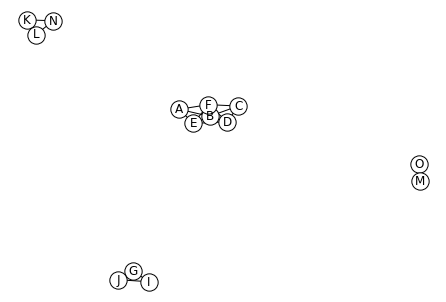

In [4]:
G = nx.read_edgelist("data.txt", create_using = MyGraph(), nodetype = str)
plt.figure(1)
nx.draw(G, node_color = color1, edgecolors = color2, with_labels = True, font_color = color2)

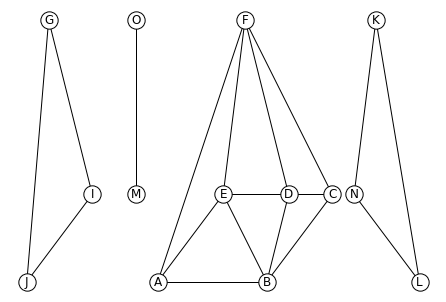

In [5]:
nodes_coords = {'A':(1,1),'B':(6,1),'C':(9,2),'D':(7,2),'E':(4,2),'F':(5,4),'G':(-4,4), 'J':(-5,1),'I':(-2,2), 'K':(11,4), 'L':(13,1),'M':(0,2),'N':(10,2),'O':(0,4)}
plt.figure(2)
nx.draw(G, pos = nodes_coords, node_color = color1, edgecolors = color2, with_labels = True, font_color = color2)
plt.savefig("Graph2.png", format="PNG")

In [6]:
G.supgraph()

1 component has:
 nodes: 6 
 edges: 11
 Degrees:
  C:3
  B:4
  E:4
  D:4
  A:3
  F:4
 Eccentricity:
  C:2
  B:2
  E:2
  D:2
  A:2
  F:2
 Radius of component: 2
 Diameter of component: 2
2 component has:
 nodes: 3 
 edges: 3
 Degrees:
  G:2
  J:2
  I:2
 Eccentricity:
  G:1
  J:1
  I:1
 Radius of component: 1
 Diameter of component: 1
3 component has:
 nodes: 3 
 edges: 3
 Degrees:
  L:2
  N:2
  K:2
 Eccentricity:
  L:1
  N:1
  K:1
 Radius of component: 1
 Diameter of component: 1
4 component has:
 nodes: 2 
 edges: 1
 Degrees:
  M:1
  O:1
 Eccentricity:
  M:1
  O:1
 Radius of component: 1
 Diameter of component: 1


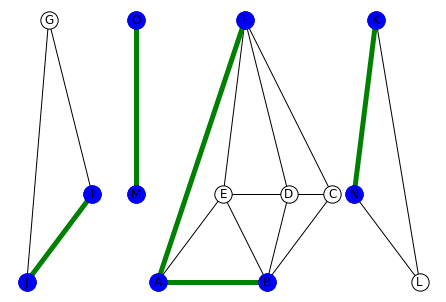

In [7]:
plt.figure(3)
diameter_nodes, diameter_edges=G.get_diameter()
nx.draw(G, pos = nodes_coords, node_color = color1, edgecolors = color2, with_labels = True, font_color = color2)
nx.draw_networkx_nodes(G, nodelist = diameter_nodes, pos = nodes_coords, node_color = color3)
nx.draw_networkx_edges(G, edgelist = diameter_edges, pos = nodes_coords, edge_color = color4, width = 5)
plt.savefig("Graph3.png", format="PNG")

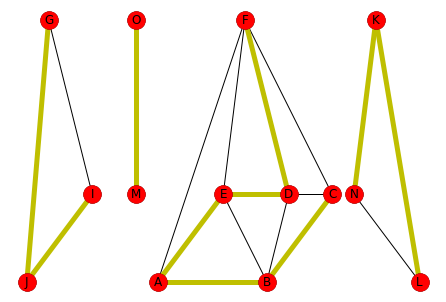

In [8]:
plt.figure(4)
G.spanning_forest()
nx.draw(G, pos = nodes_coords, node_color = color1, edgecolors = color2, with_labels = True, font_color = color2)
nx.draw_networkx_nodes(G, nodelist = G.spanning_nodes, pos = nodes_coords, node_color = color5)
nx.draw_networkx_edges(G, edgelist = G.spanning_edges, pos = nodes_coords, edge_color = color6, width = 5)
plt.savefig("Graph4.png", format="PNG")
plt.show(block = False)